In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from utils import *
plt.rcParams['text.usetex'] = True

# Binary Search

In [2]:
# # r_S = 0
# # theta_R = [0]

# # source={'r':4 ,
# #         'theta': np.pi/8} #(r, theta)




# def dt(O1, O2, theta, delta=np.pi/2):
#         i = 0
#         hmd =np.sum(O1out != O2out)
# while hmd > 0:
#                 if np.sum(O1out)>0:
#         dtheta = theta_R[-1] - delta*np.exp(-i)
#                 elif np.sum(O2out)>0:
#                         dtheta = theta_R[-1] + delta*np.exp(-i)
#                 theta_R.append(dtheta)
                
#                 i+=1
                

Time iteration:: 100%|██████████| 1000/1000 [04:03<00:00,  4.11it/s]


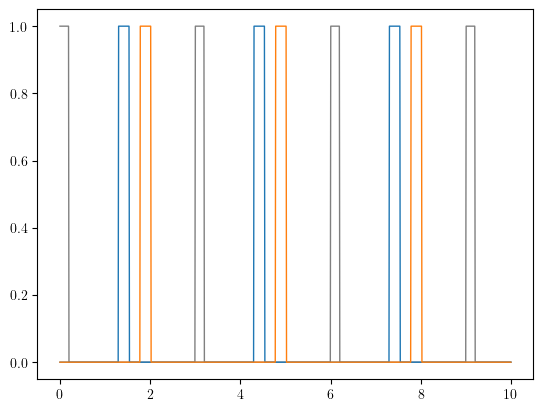

In [ ]:
%run utils.py
import pandas as pd
init_params={
    'v' : 2,                    # Wave speed
    'theta_resolution' : 1,     # degrees
    'tolerance' : 0.05,         # Detection threshold
    'r_s' : 1.0,                # r of source
    'theta_s' : np.pi / 3,      # theta of source
    'd': 3,
    'r1_amp':1,
    'r2_amp':1
    }
time_params = {
    'dt' : 0.01,                # Time step
    'tmax' : 10.0,          # Simulation duration
    'period' : 3,             # Period between source emissions
    'width' : 20,
}

# Source in polar coordinates
x_s = init_params['r_s'] * np.cos(init_params['theta_s'])
y_s = init_params['r_s'] * np.sin(init_params['theta_s'])
source = np.array([x_s, y_s])
# Receptors (fixed distance from origin along a diameter)
receptor1 = np.array([ init_params['d'], 0])  # theta = 0
receptor2 = np.array([-init_params['d'], 0])  # theta = pi

init_params.update({'s_position': [x_s,y_s],
                    'r1_position': receptor1,
                    'r2_position': receptor2
                    })

# Time array and output signals
time = np.arange(0, time_params['tmax'], time_params['dt'])
Rout1 = np.zeros_like(time)
Rout2 = np.zeros_like(time)
# emission, Sout = PeriodicEmission(time_params['tmax'], time_params['period'], time_params['dt'])


emission, Sout = PeriodicEmissionW(time, time_params)
# Create a pandas DataFrame with the signals
df = pd.DataFrame({
    'time': time,
    'Sout': Sout,
    'Rout1': Rout1,
    'Rout2': Rout2
})

# df2 = SimulateTime(df, emission, init_params)

# plt.plot(df2['time'], df2['Sout'], color='grey', linewidth=1)
# plt.plot(df2['time'], df2['Rout1'],linewidth=1)
# plt.plot(df2['time'], df2['Rout2'],linewidth=1)   

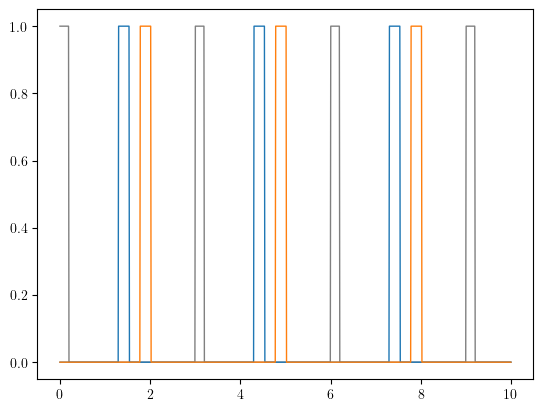

In [13]:

%run utils.py
df3 = SimulateTime2(df, emission, init_params)

plt.plot(df3['time'], df3['Sout'], color='grey', linewidth=1)
plt.plot(df3['time'], df3['Rout1'],linewidth=1)
plt.plot(df3['time'], df3['Rout2'],linewidth=1)   

# FHN Oscillator

In [ ]:

def FHN(state, t, eps,k, I):
    u, v = state  
    dudt = u - (u**3) / 3 - v + I
    dvdt = eps *(k*u - v) 
    return [dudt, dvdt]

eps = .1
k = 2
I = .6
state0= [0.0, 0.0]
t= np.linspace(0, 100, 1000)
solution = scipy.integrate.odeint(FHN, state0, t, args=(eps,k, I))

u, v = solution.T

plt.plot(t, u)
# plt.plot(t, v)

# Visualisation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Prepare figure
fig, ax = plt.subplots()

# Initialize empty lines and label texts
lines = []
texts = []
x_offset = 0.25

# Plot data for initialization
line_data = [
    (0.2 * INeuron['I1'] - 55, '$R_1$', 'grey', 0.5),
    (0.2 * INeuron['I2'] - 57, '$R_2$', 'grey', 0.3),
    (V, '$V_I$', 'blue', 0.5, '--'),
    (Iout - 52, '$I_{out}$', 'C1', 1.0),
    (O1out - 50, '$O1_{out}$', 'C2', 1.0),
    (O2out - 48, '$O2_{out}$', 'C3', 1.0),
]

# Create placeholder Line2D objects
for data in line_data:
    style = data[4] if len(data) > 4 else '-'
    line, = ax.plot([], [], style, color=data[2], alpha=data[3])
    lines.append(line)
    texts.append(ax.text(0, 0, '', va='center', ha='left'))

# Axis setup
ax.set_xlim(t_O1[0], t_O1[-1] + 1)
y_min = min([min(d[0]) for d in line_data])
y_max = max([max(d[0]) for d in line_data])
ax.set_ylim(y_min - 2, y_max + 2)
ax.set_title('LIF Neuron')
ax.set_xlabel('$t$')
ax.set_ylabel('$V(t)$')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Animation function
def animate(i):
    for idx, data in enumerate(line_data):
        y = data[0][:i]
        x = t_O1[:i]
        lines[idx].set_data(x, y)
        if i == len(t_O1) - 1:
            texts[idx].set_position((t_O1[-1] + x_offset, y[-1]))
            texts[idx].set_text(data[1])
    return lines + texts

# Run animation
ani = FuncAnimation(fig, animate, frames=len(t_O1), interval=20, blit=True)

# To display in Jupyter Notebook
plt.close()  # Prevents duplicate static plot
from IPython.display import HTML
HTML(ani.to_jshtml())
from matplotlib.animation import PillowWriter
ani.save("lif_neuron_animation.gif", writer=PillowWriter(fps=20), dpi=200)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import numpy as np

# Node positions
nodes = {
    "O1": (0, 0),
    "O2": (1, 0),
    "R2": (1, 1),
    "R1": (0, 1),
    "I": (0.5, 0.5),
}

# Individual node colors
node_colors = {
    "O1": "orange",
    "O2": "orange",
    "R1": "lightcoral",
    "R2": "lightcoral",
    "I": "lightgreen",
}

# Parameters
node_size = 300
text_offset = 0.06
arrow_offset = 0.07

# Create the plot
fig, ax = plt.subplots()

# Define arrows with offset
arrows = [
    ("R1", "I"),
    ("R1", "O1"),
    ("R2", "I"),
    ("R2", "O2"),
    ("I", "O1"),
    ("I", "O2"),
]

for src, dst in arrows:
    x0, y0 = np.array(nodes[src])
    x1, y1 = np.array(nodes[dst])
    dx, dy = x1 - x0, y1 - y0
    length = np.hypot(dx, dy)
    if length == 0:
        continue
    ux, uy = dx / length, dy / length
    start = (x0 + ux * arrow_offset, y0 + uy * arrow_offset)
    end = (x1 - ux * arrow_offset, y1 - uy * arrow_offset)

    arrow = FancyArrowPatch(
        start, end,
        arrowstyle='->',
        color='black',
        linewidth=1.5,
        mutation_scale=10
    )
    ax.add_patch(arrow)

# Draw nodes (after arrows)
for name, (x, y) in nodes.items():
    ax.scatter(x, y, s=node_size, color=node_colors.get(name, 'gray'), zorder=3)
    ax.text(x, y + text_offset, name, ha='center', fontsize=12, zorder=4)

# Set limits and appearance
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_aspect('equal')
ax.axis('off')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
nr = 500           # number of radial points
ntheta = 500        # number of angular points
dr = 1.0            # radial step size
dtheta = 2 * np.pi / ntheta
dt = 0.1            # time step
c = 1.0             # wave speed
T = 200             # number of time frames

# Create grid in polar coordinates
r = np.linspace(0, (nr-1)*dr, nr)
theta = np.linspace(0, 2*np.pi, ntheta, endpoint=False)
R, Theta = np.meshgrid(r, theta, indexing='ij')

# Convert to Cartesian for plotting convenience
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Initialize wave arrays: u_prev, u, u_next
u_prev = np.zeros((nr, ntheta))
u = np.zeros((nr, ntheta))
u_next = np.zeros((nr, ntheta))

# Source location (radial index 0, all angles)
# Initialize a pulse at the origin at t=0
u[0, :] = 1.0

# Precompute constants
c1 = (c * dt / dr)**2

# Prepare plot
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(-nr*dr, nr*dr)
ax.set_ylim(-nr*dr, nr*dr)
ax.set_aspect('equal')
ax.axis('off')

# Initialize pcolormesh with zeros, shading='auto' to match u shape
im = ax.pcolormesh(X, Y, np.zeros_like(u), cmap='Purples', vmin=0, vmax=1, shading='auto')

def update(frame):
    global u, u_prev, u_next
    
    # Wave equation update in radial direction only (simplified)
    # u_next[r,theta] = 2*u[r,theta] - u_prev[r,theta] + c1 * (u[r+1,theta] - 2*u[r,theta] + u[r-1,theta])
    # Boundary conditions:
    #   u[0, :] = pulse source that pulses every 50 frames
    #   u[-1, :] = 0 (absorbing boundary)
    
    # Update interior points
    for rr in range(1, nr-1):
        u_next[rr, :] = (2 * u[rr, :] - u_prev[rr, :] + 
                         c1 * (u[rr+1, :] - 2 * u[rr, :] + u[rr-1, :]))
    
    # Source pulse: discrete pulses every 50 frames
    if frame % 50 == 0:
        u_next[0, :] = 1.0
    else:
        u_next[0, :] = 0.0
    
    # Absorbing boundary at max radius
    u_next[-1, :] = 0.0
    
    # Convert wave to binary digital wave: crests = 1, troughs = 0
    u_binary = (u_next > 0).astype(int)
    
    # Swap references for next iteration
    u_prev, u, u_next = u, u_next, u_prev
    
    # Update plot data
    im.set_array(u_binary.ravel())
    
    return [im]

# Create animation
ani = animation.FuncAnimation(fig, update, frames=T, interval=100, blit=True)

# Save animation as GIF (use raw string for path)
video_path = r"D:\IMSc coursework\Brain, Dynamics and Computation\Project\wave_propagation.gif"
ani.save(video_path, writer='pillow', fps=24)

print(f"Saved animation to {video_path}")
plt.show()
